In [5]:
import pandas as pd

# Load the Excel file (replace 'nmr_data.xlsx' with your actual file path)
file_path = 'All_aligned_spectra v3.xlsx'  # Update this to your file's path
df = pd.read_excel(file_path)

# Display basic information
print("Dataset Info:")
print(df.info())  # Data types and non-null counts
print("\nFirst few rows:")
print(df.head())  # Show the first 5 rows
print("\nDimensions (rows, columns):", df.shape)  # Number of rows and columns

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 1397 entries, ClassID to 12
dtypes: float64(1395), object(2)
memory usage: 720.5+ KB
None

First few rows:
   ClassID           Primary ID  -1.93978  -1.92978  -1.91978  -1.90978  \
0     EVOO  296_ControlNMR-EVOO -0.037742 -0.037742 -0.003322 -0.007332   
1     EVOO  297_ControlNMR-EVOO -0.020159 -0.020159 -0.020159 -0.014388   
2     EVOO  298_ControlNMR-EVOO -0.042973 -0.042973 -0.025936 -0.014853   
3     EVOO  302_ControlNMR-EVOO -0.053067 -0.053067 -0.022915 -0.017543   
4     EVOO  304_ControlNMR-EVOO -0.081616 -0.072992 -0.066752 -0.050121   

   -1.89978  -1.88978  -1.87978  -1.86978  ...     11.91     11.92     11.93  \
0 -0.005643 -0.000488  0.022687  0.045279  ...  0.430493  0.416529  0.400159   
1  0.005981  0.011637  0.032143  0.046074  ...  0.449157  0.419575  0.400303   
2  0.004859 -0.001755  0.018581  0.027658  ...  0.391275  0.373789  0.363355   
3 -0.010908  0.002723  0.0134

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the Excel file (replace with your file path)

df = pd.read_excel(file_path)

# Step 1: Remove non-numeric columns
data_numeric = df.drop(columns=['ClassID', 'Primary ID'])

# Step 2: Baseline correction (subtract median of each row)
data_baseline = data_numeric.subtract(data_numeric.median(axis=1), axis=0)

# Step 3: Normalization (L2 norm for each sample)
data_normalized = data_baseline.div(np.sqrt((data_baseline ** 2).sum(axis=1)), axis=0)

# Step 4: Standard scaling (zero mean, unit variance across columns)
scaler = StandardScaler()
data_preprocessed = scaler.fit_transform(data_normalized)

# Convert back to DataFrame for easier inspection
data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=data_numeric.columns)

# Display summary
print("Preprocessed Data Summary:")
print(data_preprocessed_df.describe())  # Mean, std, min, max, etc.
print("\nFirst few rows of preprocessed data:")
print(data_preprocessed_df.head())

Preprocessed Data Summary:
          -1.93978      -1.92978      -1.91978      -1.90978      -1.89978   \
count  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01   
mean  -3.700743e-17  2.607342e-16 -2.523234e-17  5.719331e-17  2.355019e-17   
std    1.007663e+00  1.007663e+00  1.007663e+00  1.007663e+00  1.007663e+00   
min   -1.047912e+00 -1.037763e+00 -1.020823e+00 -1.014754e+00 -1.020431e+00   
25%   -8.085833e-01 -8.075913e-01 -8.039166e-01 -8.109244e-01 -8.093353e-01   
50%   -4.834846e-01 -4.844076e-01 -4.831286e-01 -4.910919e-01 -4.969271e-01   
75%    1.360442e+00  1.369653e+00  1.370703e+00  1.368915e+00  1.373163e+00   
max    1.468567e+00  1.464782e+00  1.456276e+00  1.463652e+00  1.457995e+00   

          -1.88978      -1.87978      -1.86978      -1.85978      -1.84978   \
count  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01   
mean  -2.254089e-16  1.682156e-18  7.233271e-17 -1.295260e-16  3.364312e-17   
std    1.007663e+00  1.0

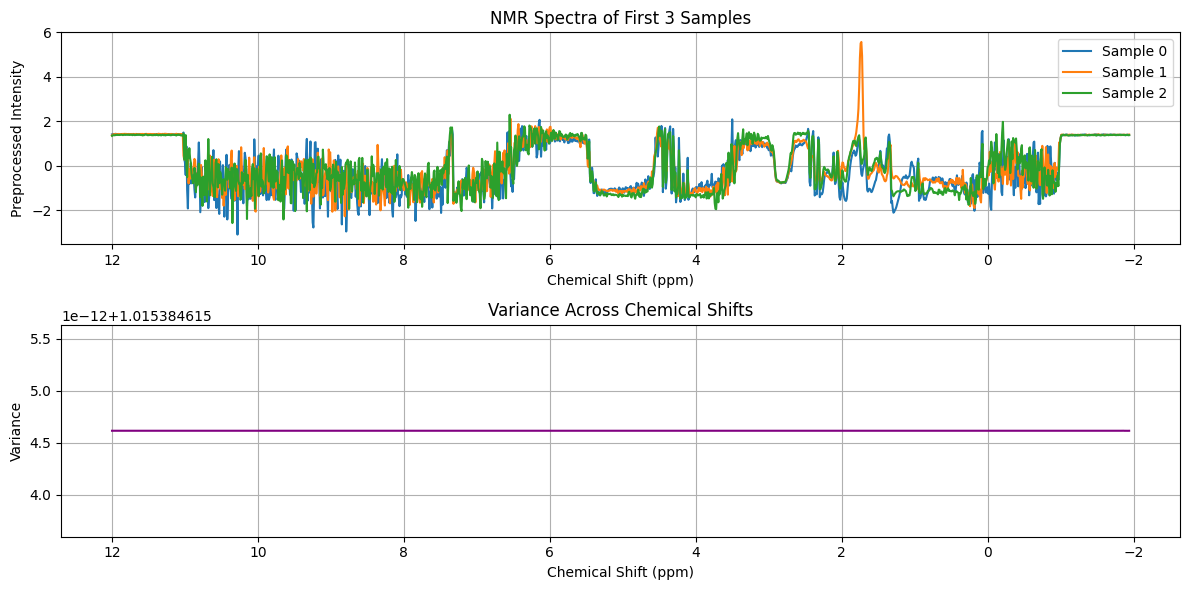

Mean Spectrum (first 10 and last 10 values):
-1.93978   -3.700743e-17
-1.92978    2.607342e-16
-1.91978   -2.523234e-17
-1.90978    5.719331e-17
-1.89978    2.355019e-17
-1.88978   -2.254089e-16
-1.87978    1.682156e-18
-1.86978    7.233271e-17
-1.85978   -1.295260e-16
-1.84978    3.364312e-17
dtype: float64
11.91   -2.085874e-16
11.92    2.657807e-16
11.93    3.229740e-16
11.94   -5.046468e-17
11.95   -8.578996e-17
11.96    1.413011e-16
11.97   -8.242565e-17
11.98   -1.530762e-16
11.99    1.547584e-16
12       1.513940e-17
dtype: float64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# 1. Variance across chemical shifts
variance = data_preprocessed_df.var()

# Plotting
plt.figure(figsize=(12, 6))

# 2. Plot spectra for first 3 samples
plt.subplot(2, 1, 1)
for i in range(3):
    plt.plot(data_preprocessed_df.columns.astype(float), data_preprocessed_df.iloc[i], label=f'Sample {i}')
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Preprocessed Intensity')
plt.title('NMR Spectra of First 3 Samples')
plt.legend()
plt.gca().invert_xaxis()  # NMR convention
plt.grid(True)

# 3. Plot variance across chemical shifts
plt.subplot(2, 1, 2)
plt.plot(variance.index.astype(float), variance, color='purple')
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('Variance')
plt.title('Variance Across Chemical Shifts')
plt.gca().invert_xaxis()
plt.grid(True)

plt.tight_layout()
plt.show()

# Additional stats (mean spectrum)
mean_spectrum = data_preprocessed_df.mean()
print("Mean Spectrum (first 10 and last 10 values):")
print(mean_spectrum.head(10))
print(mean_spectrum.tail(10))

Matplotlib is building the font cache; this may take a moment.


Explained Variance Ratio (PC1, PC2): [0.52902079 0.1328251 ]
Total Explained Variance: 0.6618458918104441


C:\Users\josed\AppData\Local\Temp\ipykernel_6564\3597698821.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Use a colormap with enough colors


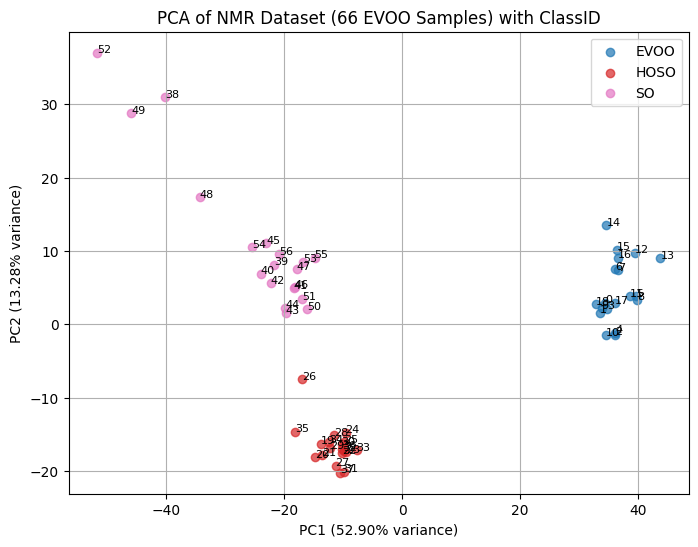


Top 5 chemical shifts contributing to PC1:
5.64012    0.036599
5.68012    0.036553
5.63012    0.036549
5.67012    0.036547
5.74012    0.036542
Name: PC1, dtype: float64

Top 5 chemical shifts contributing to PC2:
4.56014    0.065493
2.05017    0.063983
4.55014    0.062740
4.57014    0.061849
5.48013    0.061534
Name: PC2, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load and preprocess the data
file_path = 'All_aligned_spectra v3.xlsx'  # Update this
df = pd.read_excel(file_path)

# Keep ClassID for labeling, but drop it and Primary ID for numerical data
class_labels = df['ClassID']
data_numeric = df.drop(columns=['ClassID', 'Primary ID'])
data_baseline = data_numeric.subtract(data_numeric.median(axis=1), axis=0)
data_normalized = data_baseline.div(np.sqrt((data_baseline ** 2).sum(axis=1)), axis=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_preprocessed = scaler.fit_transform(data_normalized)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_preprocessed)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio (PC1, PC2):", explained_variance)
print("Total Explained Variance:", sum(explained_variance))

# Plot PCA results with ClassID coloring
plt.figure(figsize=(8, 6))

# Get unique class labels
unique_classes = class_labels.unique()

# Color map for different classes
colors = plt.cm.get_cmap('tab10', len(unique_classes))  # Use a colormap with enough colors

# Plot each class with a different color
for i, cls in enumerate(unique_classes):
    if pd.isna(cls):  # Handle missing ClassID values
        continue
    idx = class_labels == cls
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], alpha=0.7, label=cls, color=colors(i))
    # Add sample labels
    for j in range(len(pca_result[idx])):
        plt.text(pca_result[idx][j, 0], pca_result[idx][j, 1], str(df.index[idx][j]), fontsize=8)

plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)')
plt.title('PCA of NMR Dataset (66 EVOO Samples) with ClassID')
plt.legend()
plt.grid(True)
plt.show()

# Loadings (same as before)
loadings = pd.DataFrame(pca.components_.T, index=data_numeric.columns, columns=['PC1', 'PC2'])
print("\nTop 5 chemical shifts contributing to PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())
print("\nTop 5 chemical shifts contributing to PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head())

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load the data
file_path = 'All_aligned_spectra v3.xlsx'  # Update this
df = pd.read_excel(file_path)

# Preprocess the data (same as before)
class_labels = df['ClassID']
data_numeric = df.drop(columns=['ClassID', 'Primary ID'])
data_baseline = data_numeric.subtract(data_numeric.median(axis=1), axis=0)
data_normalized = data_baseline.div(np.sqrt((data_baseline ** 2).sum(axis=1)), axis=0)
scaler = StandardScaler()
data_preprocessed = scaler.fit_transform(data_normalized)
data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=data_numeric.columns)

# Use only labeled samples (drop rows where ClassID is NaN)
df_labeled = pd.DataFrame(data_preprocessed, index=df.index, columns=data_numeric.columns)
df_labeled['ClassID'] = class_labels
df_labeled = df_labeled.dropna(subset=['ClassID'])

# Features and labels
X = df_labeled.drop(columns=['ClassID'])
y = df_labeled['ClassID']

# Encode labels (SO, HOSO, EVOO)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode labels for PLS-DA
onehot_encoder = OneHotEncoder(sparse_output=False)  # Updated parameter name
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = train_test_split(
    X, y_encoded, y_onehot, test_size=0.2, random_state=42
)

# 1. PLS-DA (using PLSRegression for classification)
plsda = PLSRegression(n_components=2)
plsda.fit(X_train, y_train_onehot)  # Fit with one-hot encoded labels
y_pred_plsda = plsda.predict(X_test).argmax(axis=1)  # Predict and convert to class
accuracy_plsda = accuracy_score(y_test, y_pred_plsda)
print("PLS-DA Accuracy:", accuracy_plsda)
print("PLS-DA Classification Report:")
print(classification_report(y_test, y_pred_plsda, target_names=label_encoder.classes_))

# 2. SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

PLS-DA Accuracy: 1.0
PLS-DA Classification Report:
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         5
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


SVM Accuracy: 1.0
SVM Classification Report:
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         5
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

        EVOO       1

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_squared_error, r2_score
from sklearn.preprocessing import label_binarize

# Load the data
file_path = 'All_aligned_spectra v3.xlsx'  # Update this
df = pd.read_excel(file_path)

# Preprocess the data (same as before)
class_labels = df['ClassID']
data_numeric = df.drop(columns=['ClassID', 'Primary ID'])
data_baseline = data_numeric.subtract(data_numeric.median(axis=1), axis=0)
data_normalized = data_baseline.div(np.sqrt((data_baseline ** 2).sum(axis=1)), axis=0)
scaler = StandardScaler()
data_preprocessed = scaler.fit_transform(data_normalized)
data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=data_numeric.columns)

# Split into labeled and unlabeled samples
df_labeled = pd.DataFrame(data_preprocessed, index=df.index, columns=data_numeric.columns)
df_labeled['ClassID'] = class_labels
df_unlabeled = df_labeled[df_labeled['ClassID'].isna()].drop(columns=['ClassID'])
df_labeled = df_labeled.dropna(subset=['ClassID'])

# Features and labels for labeled data
X = df_labeled.drop(columns=['ClassID'])
y = df_labeled['ClassID']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split labeled data into training and test sets
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = train_test_split(
    X, y_encoded, y_onehot, test_size=0.2, random_state=42
)

# Train models
# 1. PLS-DA
plsda = PLSRegression(n_components=2)
plsda.fit(X_train, y_train_onehot)
y_pred_plsda = plsda.predict(X_test).argmax(axis=1)
y_pred_plsda_prob = plsda.predict(X_test)  # For AUC

# 2. SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm_prob = svm.predict_proba(X_test)

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Validation Metrics
# Binarize y_test for AUC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))

# R² and RMSE for PLS-DA
r2_plsda = r2_score(y_test_onehot, plsda.predict(X_test))
rmse_plsda = np.sqrt(mean_squared_error(y_test_onehot, plsda.predict(X_test)))
print("PLS-DA R²:", r2_plsda)
print("PLS-DA RMSE:", rmse_plsda)

# AUC for all models
auc_plsda = roc_auc_score(y_test_bin, y_pred_plsda_prob, multi_class='ovr')
auc_svm = roc_auc_score(y_test_bin, y_pred_svm_prob, multi_class='ovr')
auc_rf = roc_auc_score(y_test_bin, y_pred_rf_prob, multi_class='ovr')
print("\nAUC Scores:")
print("PLS-DA AUC:", auc_plsda)
print("SVM AUC:", auc_svm)
print("Random Forest AUC:", auc_rf)

# Predict classes for unlabeled samples
if not df_unlabeled.empty:
    # PLS-DA predictions
    y_unlabeled_plsda = plsda.predict(df_unlabeled).argmax(axis=1)
    y_unlabeled_plsda_labels = label_encoder.inverse_transform(y_unlabeled_plsda)
    
    # SVM predictions
    y_unlabeled_svm = svm.predict(df_unlabeled)
    y_unlabeled_svm_labels = label_encoder.inverse_transform(y_unlabeled_svm)
    
    # Random Forest predictions
    y_unlabeled_rf = rf.predict(df_unlabeled)
    y_unlabeled_rf_labels = label_encoder.inverse_transform(y_unlabeled_rf)
    
    # Combine predictions into a DataFrame
    unlabeled_predictions = pd.DataFrame({
        'PLS-DA': y_unlabeled_plsda_labels,
        'SVM': y_unlabeled_svm_labels,
        'Random Forest': y_unlabeled_rf_labels
    }, index=df_unlabeled.index)
    print("\nPredictions for Unlabeled Samples:")
    print(unlabeled_predictions)
else:
    print("\nNo unlabeled samples found.")

PLS-DA R²: 0.9534157121678795
PLS-DA RMSE: 0.0992337925500958

AUC Scores:
PLS-DA AUC: 1.0
SVM AUC: 1.0
Random Forest AUC: 1.0

Predictions for Unlabeled Samples:
   PLS-DA   SVM Random Forest
57   EVOO  EVOO          EVOO
58   EVOO  EVOO          EVOO
59   EVOO  EVOO          EVOO
60   HOSO  HOSO          HOSO
61   HOSO  HOSO          HOSO
62   HOSO  HOSO          HOSO
63     SO    SO            SO
64     SO    SO            SO
65     SO    SO            SO


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the data
file_path = 'All_aligned_spectra v3.xlsx'  # Update this
df = pd.read_excel(file_path)

# Preprocess the data (same as before)
class_labels = df['ClassID']
data_numeric = df.drop(columns=['ClassID', 'Primary ID'])
data_baseline = data_numeric.subtract(data_numeric.median(axis=1), axis=0)
data_normalized = data_baseline.div(np.sqrt((data_baseline ** 2).sum(axis=1)), axis=0)
scaler = StandardScaler()
data_preprocessed = scaler.fit_transform(data_normalized)
data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=data_numeric.columns)

# Use only labeled samples
df_labeled = pd.DataFrame(data_preprocessed, index=df.index, columns=data_numeric.columns)
df_labeled['ClassID'] = class_labels
df_labeled = df_labeled.dropna(subset=['ClassID'])

# Features and labels
X = df_labeled.drop(columns=['ClassID'])
y = df_labeled['ClassID']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Split into training and test sets
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = train_test_split(
    X, y_encoded, y_onehot, test_size=0.2, random_state=42
)

# Train models
# 1. PLS-DA
plsda = PLSRegression(n_components=2)
plsda.fit(X_train, y_train_onehot)

# 2. SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
# PLS-DA: Use coefficients (loadings) for each class
plsda_loadings = pd.DataFrame(plsda.coef_, index=label_encoder.classes_, columns=X.columns)
print("PLS-DA Loadings (Top 5 Chemical Shifts per Class):")
for class_name in label_encoder.classes_:
    print(f"\nClass {class_name}:")
    print(plsda_loadings.loc[class_name].abs().sort_values(ascending=False).head())

# SVM: Use permutation importance (approximation for non-linear kernel)
from sklearn.inspection import permutation_importance
svm_perm_importance = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42)
svm_importance_df = pd.DataFrame({
    'Chemical Shift': X.columns,
    'Importance': svm_perm_importance.importances_mean
})
print("\nSVM Feature Importance (Top 5 Chemical Shifts):")
print(svm_importance_df.sort_values(by='Importance', ascending=False).head())

# Random Forest: Use built-in feature importance
rf_importance_df = pd.DataFrame({
    'Chemical Shift': X.columns,
    'Importance': rf.feature_importances_
})
print("\nRandom Forest Feature Importance (Top 5 Chemical Shifts):")
print(rf_importance_df.sort_values(by='Importance', ascending=False).head())

PLS-DA Loadings (Top 5 Chemical Shifts per Class):

Class EVOO:
4.49014    0.000943
4.38014    0.000916
4.48014    0.000910
5.58012    0.000907
4.43014    0.000899
Name: EVOO, dtype: float64

Class HOSO:
5.47013    0.002460
5.46013    0.002456
5.48013    0.002408
2.05017    0.002339
1.99017    0.002315
Name: HOSO, dtype: float64

Class SO:
5.47013    0.001898
2.72016    0.001786
2.73016    0.001778
5.43013    0.001777
5.48013    0.001774
Name: SO, dtype: float64

SVM Feature Importance (Top 5 Chemical Shifts):
     Chemical Shift  Importance
1394             12         0.0
0          -1.93978         0.0
1          -1.92978         0.0
1378          11.84         0.0
1377          11.83         0.0

Random Forest Feature Importance (Top 5 Chemical Shifts):
     Chemical Shift  Importance
752         5.58012    0.026116
509         3.15016    0.019262
68         -1.25979    0.014658
482         2.88016    0.011274
1384           11.9    0.011250
